i =  0
AXc =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 4 vertices
BUc =  A 0-dimensional polyhedron in QQ^2 defined as the convex hull of 1 vertex
Xc =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 4 vertices
Xp =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 8 vertices
Uc =  A 1-dimensional polyhedron in QQ^1 defined as the convex hull of 2 vertices
i =  1
AXc =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 4 vertices
BUc =  A 1-dimensional polyhedron in QQ^2 defined as the convex hull of 2 vertices
Xc =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 6 vertices
Xp =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 8 vertices
Uc =  A 1-dimensional polyhedron in QQ^1 defined as the convex hull of 2 vertices
i =  2
AXc =  A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 6 vertices
BUc =  A 1-dimensional polyhedron in QQ^2 defined as the convex hull of 2 

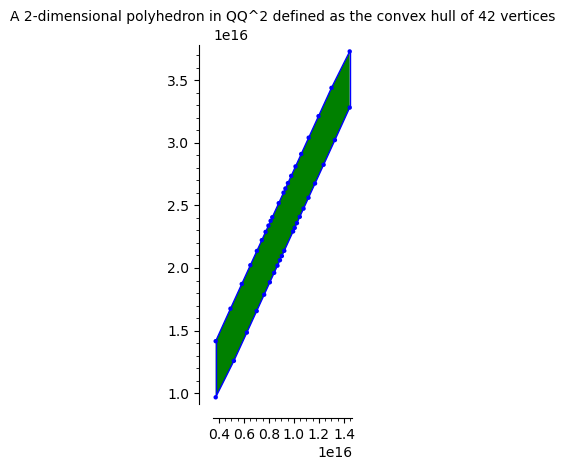

In [7]:
def box(n, ep):
    zeros = [0]*(n+1)
    zeros[0] = ep
    mat = []
    for i in range(2*n):
        mat.append(zeros*1)
    # print(mat)

    for i in range(n):
        mat[i][i+1] = 1
    j = 1
    for i in range(n,2*n):
        mat[i][j] = -1
        j += 1
    Box = Polyhedron(ieqs=mat, backend='ppl', base_ring=QQ)
    return Box

# We will run a simple 2D example for algorithm 1, First we define the initial state and the initial input
# X = [x y] is a state in 2D
# U = [u] is an input in 1D
X0 = Polyhedron(ieqs=[(-1,0,1),(4,0,-1),(-2,3,-1),(2,-1,1)])
U0 = Polyhedron(eqns=[(-3,1)])

# Since we have X in 2D and U in 1D, A will be a 2x2 matrix, B will be a 2x1 matrix, and K will be a 1x2 matrix
A = Matrix([[1,2],[3,4]])
B = Matrix([[0],[1]])
K = Matrix([0, 1])

# We have the box in 2D with ep=0.2
Box = box(2, 0.2)

# Now we write the algorithm
Xc = X0
Uc = U0
iter = 20

for i in range(iter):
    print('i = ', i)
    AXc = A*Xc
    print("AXc = ", AXc)
    BUc = B*Uc
    print("BUc = ", BUc)
    Xc = AXc + BUc    
    print('Xc = ', Xc)
    # print('Box = ', Box)
    Xp = Xc + Box
    print('Xp = ', Xp)
    Uc = K*Xp
    print('Uc = ', Uc)

Xc
